In [3]:
import numpy as np
import pandas as pd
from scipy.stats import zscore

# 示例数据
data =  pd.read_csv(r'C:\Users\11712\notebook所有\Untitled Folder\train\train_ID01.csv')

# 计算 Z-Score
data['z_score'] = zscore(data['wind_obs'])

# 标记异常值（Z-Score 绝对值大于 3）
data['is_outlier'] = abs(data['z_score']) > 3

# 输出结果
print(data)

                 date_time  wind_obs  power_real   z_score  is_outlier
0      2023-04-01 00:00:00    6.8681     75724.5  0.505277       False
1      2023-04-01 00:15:00    7.2264     89757.7  0.631043       False
2      2023-04-01 00:30:00    7.6754    106131.5  0.788646       False
3      2023-04-01 00:45:00    8.3588    127344.8  1.028524       False
4      2023-04-01 01:00:00    8.7387    137608.4  1.161872       False
...                    ...       ...         ...       ...         ...
43867  2024-06-30 22:45:00    6.0153     50341.4  0.205938       False
43868  2024-06-30 23:00:00    6.1280     52411.4  0.245496       False
43869  2024-06-30 23:15:00    6.5034     63788.5  0.377265       False
43870  2024-06-30 23:30:00    6.7709     73125.3  0.471159       False
43871  2024-06-30 23:45:00    7.0709     81755.2  0.576461       False

[43872 rows x 5 columns]


In [4]:
#Pandas 提供的 .sum() 方法来统计布尔列（如 is_outlier）中 True 的数量。这是因为布尔值 True 在数值运算中会被视为 1，而 False 会被视为 0。
#因此，直接对布尔列求和即可得到 True 的数量。
import numpy as np
import pandas as pd
from scipy.stats import zscore

# 示例数据
data = pd.read_csv(r'C:\Users\11712\notebook所有\Untitled Folder\train\train_ID01.csv')

# 计算 Z-Score
data['z_score'] = zscore(data['wind_obs'])

# 标记异常值（Z-Score 绝对值大于 3）
data['is_outlier'] = abs(data['z_score']) > 3

# 统计 is_outlier 列中 True 的数量
num_outliers = data['is_outlier'].sum()

# 输出结果
print("Number of outliers:", num_outliers)

Number of outliers: 86


In [7]:
#输出每个异常点对应的时间点，可以通过筛选数据框中 is_outlier 为 True 的行，并提取对应的时间列（假设数据中有时间列）。
import numpy as np
import pandas as pd
from scipy.stats import zscore

# 示例数据
data = pd.read_csv(r'C:\Users\11712\notebook所有\Untitled Folder\train\train_ID01.csv')

# 确保时间列是 datetime 类型（假设时间列名为 'timestamp'）
data['date_time'] = pd.to_datetime(data['date_time'])

# 计算 Z-Score
data['z_score'] = zscore(data['wind_obs'])

# 标记异常值（Z-Score 绝对值大于 3）
data['is_outlier'] = abs(data['z_score']) > 3.43

# 筛选出异常点及其对应的时间点
outliers = data[data['is_outlier']][['date_time', 'wind_obs', 'z_score']]

# 输出异常点及其时间点
print("异常点及其时间点：")
print(outliers)

异常点及其时间点：
                date_time  wind_obs   z_score
864   2023-04-10 00:00:00   15.6230  3.578313
1142  2023-04-12 21:30:00   15.5794  3.563009
1143  2023-04-12 21:45:00   18.8090  4.696623
1144  2023-04-12 22:00:00   18.9112  4.732496
1145  2023-04-12 22:15:00   17.5933  4.269903
1149  2023-04-12 23:15:00   17.9227  4.385525
1150  2023-04-12 23:30:00   20.7234  5.368592
1151  2023-04-12 23:45:00   20.4242  5.263570
1152  2023-04-13 00:00:00   18.2150  4.488124
1874  2023-04-20 12:30:00   15.7204  3.612501
1875  2023-04-20 12:45:00   17.0913  4.093697
1876  2023-04-20 13:00:00   16.4142  3.856030
1877  2023-04-20 13:15:00   16.0236  3.718927
1878  2023-04-20 13:30:00   15.6399  3.584245
1879  2023-04-20 13:45:00   15.4602  3.521169
2670  2023-04-28 19:30:00   15.3831  3.494106
2891  2023-05-01 02:45:00   15.2609  3.451213
2895  2023-05-01 03:45:00   15.6239  3.578629
2896  2023-05-01 04:00:00   15.5913  3.567186
2897  2023-05-01 04:15:00   15.4131  3.504636
5221  2023-05-25 09:15:0

In [25]:
#筛选出2023年06月01日到2024年05月31日的数据，并在这个范围内检测异常值。需要注意的是，data.index 是默认的整数索引，而不是时间索引
import numpy as np
import pandas as pd
from scipy.stats import zscore

# 示例数据
data = pd.read_csv(r'C:\Users\11712\notebook所有\Untitled Folder\train\train_ID01.csv')

# 确保时间列是 datetime 类型（假设时间列名为 'date_time'）
data['date_time'] = pd.to_datetime(data['date_time'])

# 筛选出2023年06月01日到2024年05月31日的数据
start_date = '2023-06-01 00:00:00'
end_date = '2024-05-31 23:45:00'
filtered_data = data[(data['date_time'] >= start_date) & (data['date_time'] <= end_date)]

# 计算 Z-Score
filtered_data['z_score'] = zscore(filtered_data['wind_obs'])

# 标记异常值（Z-Score 绝对值大于 3.43）
filtered_data['is_outlier'] = abs(filtered_data['z_score']) > 3.3

# 筛选出异常点及其对应的时间点
outliers = filtered_data[filtered_data['is_outlier']][['date_time', 'wind_obs', 'z_score']]

# 输出异常点及其时间点
print("异常点及其时间点：")
print(outliers)

异常点及其时间点：
                date_time  wind_obs   z_score
11035 2023-07-24 22:45:00   15.0824  3.537087
11036 2023-07-24 23:00:00   14.8938  3.469131
33879 2024-03-18 21:45:00   14.4926  3.324571
35057 2024-03-31 04:15:00   14.7976  3.434468
35058 2024-03-31 04:30:00   15.0916  3.540402
37271 2024-04-23 05:45:00   14.9213  3.479040
37272 2024-04-23 06:00:00   15.0793  3.535970
39363 2024-05-15 00:45:00   15.2083  3.582452


C:\Users\11712\AppData\Local\Temp\ipykernel_14052\2694511962.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['z_score'] = zscore(filtered_data['wind_obs'])
C:\Users\11712\AppData\Local\Temp\ipykernel_14052\2694511962.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['is_outlier'] = abs(filtered_data['z_score']) > 3.3


异常点及其时间点：
                date_time  wind_obs   z_score
11035 2023-07-24 22:45:00   15.0824  3.537087
11036 2023-07-24 23:00:00   14.8938  3.469131
35057 2024-03-31 04:15:00   14.7976  3.434468
35058 2024-03-31 04:30:00   15.0916  3.540402
37271 2024-04-23 05:45:00   14.9213  3.479040
37272 2024-04-23 06:00:00   15.0793  3.535970
39363 2024-05-15 00:45:00   15.2083  3.582452


C:\Users\11712\AppData\Local\Temp\ipykernel_3328\2855534218.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:, 'z_score'] = zscore(filtered_data['wind_obs'])  # 使用 .loc 进行赋值
C:\Users\11712\AppData\Local\Temp\ipykernel_3328\2855534218.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:, 'is_outlier'] = abs(filtered_data['z_score']) > 3.43  # 使用 .loc 进行赋值


In [11]:
import numpy as np
import pandas as pd
from scipy.stats import zscore

# 示例数据
data = pd.read_csv(r'C:\Users\11712\notebook所有\Untitled Folder\train\train_ID01.csv')

# 确保时间列是 datetime 类型（假设时间列名为 'date_time'）
data['date_time'] = pd.to_datetime(data['date_time'])

# 筛选出2023年06月01日到2024年05月31日的数据
start_date = '2023-06-01 00:00:00'
end_date = '2024-05-31 23:45:00'
filtered_data = data[(data['date_time'] >= start_date) & (data['date_time'] <= end_date)]

# 计算 Z-Score
filtered_data['z_score'] = zscore(filtered_data['wind_obs'])

# 标记异常值（Z-Score 绝对值大于 3.43）
filtered_data['is_outlier'] = abs(filtered_data['z_score']) > 3.58

# 筛选出异常点及其对应的时间点
outliers = filtered_data[filtered_data['is_outlier']][['date_time', 'wind_obs', 'z_score']]

# 输出异常点及其时间点
print("异常点及其时间点：")
print(outliers)

异常点及其时间点：
                date_time  wind_obs   z_score
39363 2024-05-15 00:45:00   15.2083  3.582452


C:\Users\11712\AppData\Local\Temp\ipykernel_3328\2290063603.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['z_score'] = zscore(filtered_data['wind_obs'])
C:\Users\11712\AppData\Local\Temp\ipykernel_3328\2290063603.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['is_outlier'] = abs(filtered_data['z_score']) > 3.58


In [15]:
import numpy as np
import pandas as pd
from scipy.stats import zscore

# 示例数据
data = pd.read_csv(r'C:\Users\11712\notebook所有\Untitled Folder\train\train_ID10.csv')

# 确保时间列是 datetime 类型（假设时间列名为 'date_time'）
data['date_time'] = pd.to_datetime(data['date_time'])

# 筛选出2023年06月01日到2024年05月31日的数据
start_date = '2023-06-01 00:00:00'
end_date = '2024-05-31 23:45:00'
filtered_data = data[(data['date_time'] >= start_date) & (data['date_time'] <= end_date)]

# 计算 Z-Score
filtered_data.loc[:, 'z_score'] = zscore(filtered_data['wind_obs'])  # 使用 .loc 进行赋值

# 标记异常值（Z-Score 绝对值大于 3.58）
filtered_data.loc[:, 'is_outlier'] = abs(filtered_data['z_score']) > 3  # 使用 .loc 进行赋值

# 筛选出异常点及其对应的时间点
outliers = filtered_data[filtered_data['is_outlier']][['date_time', 'wind_obs', 'z_score']]

# 输出异常点及其时间点
print("异常点及其时间点：")
print(outliers)

异常点及其时间点：
                date_time  wind_obs    z_score
22542 2024-01-21 19:30:00  311.8353  24.461665
22543 2024-01-21 19:45:00  590.1871  46.683731
22544 2024-01-21 20:00:00   44.8416   3.146366
23086 2024-01-27 11:30:00  260.4075  20.355954
23087 2024-01-27 11:45:00  554.5323  43.837249
23088 2024-01-27 12:00:00  544.7760  43.058360
23089 2024-01-27 12:15:00  525.7027  41.535654
23090 2024-01-27 12:30:00  525.7027  41.535654
23091 2024-01-27 12:45:00  525.7027  41.535654
23092 2024-01-27 13:00:00  528.9939  41.798405
23093 2024-01-27 13:15:00  544.9733  43.074112
23094 2024-01-27 13:30:00  544.0654  43.001630
23095 2024-01-27 13:45:00  547.0831  43.242546
23096 2024-01-27 14:00:00  541.0333  42.759564
23097 2024-01-27 14:15:00  549.2124  43.412538
23098 2024-01-27 14:30:00  541.8213  42.822473
23099 2024-01-27 14:45:00  543.5072  42.957066
23100 2024-01-27 15:00:00  532.2226  42.056166
23101 2024-01-27 15:15:00  541.3259  42.782923
23102 2024-01-27 15:30:00  550.6396  43.526478
231

C:\Users\11712\AppData\Local\Temp\ipykernel_3328\143589070.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:, 'z_score'] = zscore(filtered_data['wind_obs'])  # 使用 .loc 进行赋值
C:\Users\11712\AppData\Local\Temp\ipykernel_3328\143589070.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:, 'is_outlier'] = abs(filtered_data['z_score']) > 3  # 使用 .loc 进行赋值


In [16]:
filtered_data

,date_time,wind_obs,power_real,z_score,is_outlier
0,2023-06-01 00:00:00,4.8931,10537.2,-0.042901,False
1,2023-06-01 00:15:00,4.8931,11181.3,-0.042901,False
2,2023-06-01 00:30:00,4.9252,11789.2,-0.040339,False
3,2023-06-01 00:45:00,4.9456,11401.1,-0.038710,False
4,2023-06-01 01:00:00,4.5535,8839.6,-0.070013,False
...,...,...,...,...,...
35131,2024-05-31 22:45:00,3.6331,4.4,-0.143493,False
35132,2024-05-31 23:00:00,3.6331,4.4,-0.143493,False
35133,2024-05-31 23:15:00,3.6331,4.4,-0.143493,False
35134,2024-05-31 23:30:00,3.6331,4.4,-0.143493,False


In [17]:
#1计算非异常值的均值。
#2. 将异常值替换为该均值。
import numpy as np
import pandas as pd
from scipy.stats import zscore

# 示例数据
data = pd.read_csv(r'C:\Users\11712\notebook所有\Untitled Folder\train\train_ID10.csv')

# 确保时间列是 datetime 类型（假设时间列名为 'date_time'）
data['date_time'] = pd.to_datetime(data['date_time'])

# 筛选出2023年06月01日到2024年05月31日的数据
start_date = '2023-06-01 00:00:00'
end_date = '2024-05-31 23:45:00'
filtered_data = data[(data['date_time'] >= start_date) & (data['date_time'] <= end_date)]

# 计算 Z-Score
filtered_data.loc[:, 'z_score'] = zscore(filtered_data['wind_obs'])  # 使用 .loc 进行赋值

# 标记异常值（Z-Score 绝对值大于 3）
filtered_data.loc[:, 'is_outlier'] = abs(filtered_data['z_score']) > 3  # 使用 .loc 进行赋值

# 筛选出异常点及其对应的时间点
outliers = filtered_data[filtered_data['is_outlier']][['date_time', 'wind_obs', 'z_score']]

# 输出异常点及其时间点
print("异常点及其时间点：")
print(outliers)

# 删除异常值并用均值替代
# 计算非异常值的均值
mean_value = filtered_data.loc[~filtered_data['is_outlier'], 'wind_obs'].mean()

# 替换异常值
filtered_data.loc[filtered_data['is_outlier'], 'wind_obs'] = mean_value

# 输出处理后的数据
print("处理后的数据：")
print(filtered_data[['date_time', 'wind_obs']])

异常点及其时间点：
                date_time  wind_obs    z_score
22542 2024-01-21 19:30:00  311.8353  24.461665
22543 2024-01-21 19:45:00  590.1871  46.683731
22544 2024-01-21 20:00:00   44.8416   3.146366
23086 2024-01-27 11:30:00  260.4075  20.355954
23087 2024-01-27 11:45:00  554.5323  43.837249
23088 2024-01-27 12:00:00  544.7760  43.058360
23089 2024-01-27 12:15:00  525.7027  41.535654
23090 2024-01-27 12:30:00  525.7027  41.535654
23091 2024-01-27 12:45:00  525.7027  41.535654
23092 2024-01-27 13:00:00  528.9939  41.798405
23093 2024-01-27 13:15:00  544.9733  43.074112
23094 2024-01-27 13:30:00  544.0654  43.001630
23095 2024-01-27 13:45:00  547.0831  43.242546
23096 2024-01-27 14:00:00  541.0333  42.759564
23097 2024-01-27 14:15:00  549.2124  43.412538
23098 2024-01-27 14:30:00  541.8213  42.822473
23099 2024-01-27 14:45:00  543.5072  42.957066
23100 2024-01-27 15:00:00  532.2226  42.056166
23101 2024-01-27 15:15:00  541.3259  42.782923
23102 2024-01-27 15:30:00  550.6396  43.526478
231

C:\Users\11712\AppData\Local\Temp\ipykernel_3328\2507173360.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:, 'z_score'] = zscore(filtered_data['wind_obs'])  # 使用 .loc 进行赋值
C:\Users\11712\AppData\Local\Temp\ipykernel_3328\2507173360.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:, 'is_outlier'] = abs(filtered_data['z_score']) > 3  # 使用 .loc 进行赋值


In [18]:
#只输出被替换成均值的异常点信息
import numpy as np
import pandas as pd
from scipy.stats import zscore

# 示例数据
data = pd.read_csv(r'C:\Users\11712\notebook所有\Untitled Folder\train\train_ID10.csv')

# 确保时间列是 datetime 类型（假设时间列名为 'date_time'）
data['date_time'] = pd.to_datetime(data['date_time'])

# 筛选出2023年06月01日到2024年05月31日的数据
start_date = '2023-06-01 00:00:00'
end_date = '2024-05-31 23:45:00'
filtered_data = data[(data['date_time'] >= start_date) & (data['date_time'] <= end_date)]

# 计算 Z-Score
filtered_data.loc[:, 'z_score'] = zscore(filtered_data['wind_obs'])  # 使用 .loc 进行赋值

# 标记异常值（Z-Score 绝对值大于 3）
filtered_data.loc[:, 'is_outlier'] = abs(filtered_data['z_score']) > 3  # 使用 .loc 进行赋值

# 筛选出异常点及其对应的时间点
outliers = filtered_data[filtered_data['is_outlier']][['date_time', 'wind_obs', 'z_score']]

# 输出异常点及其时间点
print("异常点及其时间点：")
print(outliers)

# 删除异常值并用均值替代
# 计算非异常值的均值
mean_value = filtered_data.loc[~filtered_data['is_outlier'], 'wind_obs'].mean()

# 替换异常值
filtered_data.loc[filtered_data['is_outlier'], 'wind_obs'] = mean_value

# 筛选出被替换后的异常点信息
replaced_outliers = filtered_data[filtered_data['is_outlier']][['date_time', 'wind_obs', 'z_score']]

# 输出被替换后的异常点信息
print("被替换成均值的异常点信息：")
print(replaced_outliers)

异常点及其时间点：
                date_time  wind_obs    z_score
22542 2024-01-21 19:30:00  311.8353  24.461665
22543 2024-01-21 19:45:00  590.1871  46.683731
22544 2024-01-21 20:00:00   44.8416   3.146366
23086 2024-01-27 11:30:00  260.4075  20.355954
23087 2024-01-27 11:45:00  554.5323  43.837249
23088 2024-01-27 12:00:00  544.7760  43.058360
23089 2024-01-27 12:15:00  525.7027  41.535654
23090 2024-01-27 12:30:00  525.7027  41.535654
23091 2024-01-27 12:45:00  525.7027  41.535654
23092 2024-01-27 13:00:00  528.9939  41.798405
23093 2024-01-27 13:15:00  544.9733  43.074112
23094 2024-01-27 13:30:00  544.0654  43.001630
23095 2024-01-27 13:45:00  547.0831  43.242546
23096 2024-01-27 14:00:00  541.0333  42.759564
23097 2024-01-27 14:15:00  549.2124  43.412538
23098 2024-01-27 14:30:00  541.8213  42.822473
23099 2024-01-27 14:45:00  543.5072  42.957066
23100 2024-01-27 15:00:00  532.2226  42.056166
23101 2024-01-27 15:15:00  541.3259  42.782923
23102 2024-01-27 15:30:00  550.6396  43.526478
231

C:\Users\11712\AppData\Local\Temp\ipykernel_3328\2568467017.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:, 'z_score'] = zscore(filtered_data['wind_obs'])  # 使用 .loc 进行赋值
C:\Users\11712\AppData\Local\Temp\ipykernel_3328\2568467017.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:, 'is_outlier'] = abs(filtered_data['z_score']) > 3  # 使用 .loc 进行赋值


In [19]:
#线性插值来替换异常点
import numpy as np
import pandas as pd
from scipy.stats import zscore

# 示例数据
data = pd.read_csv(r'C:\Users\11712\notebook所有\Untitled Folder\train\train_ID10.csv')

# 确保时间列是 datetime 类型（假设时间列名为 'date_time'）
data['date_time'] = pd.to_datetime(data['date_time'])

# 筛选出2023年06月01日到2024年05月31日的数据
start_date = '2023-06-01 00:00:00'
end_date = '2024-05-31 23:45:00'
filtered_data = data[(data['date_time'] >= start_date) & (data['date_time'] <= end_date)]

# 计算 Z-Score
filtered_data.loc[:, 'z_score'] = zscore(filtered_data['wind_obs'])  # 使用 .loc 进行赋值

# 标记异常值（Z-Score 绝对值大于 3）
filtered_data.loc[:, 'is_outlier'] = abs(filtered_data['z_score']) > 3  # 使用 .loc 进行赋值

# 筛选出异常点及其对应的时间点
outliers = filtered_data[filtered_data['is_outlier']][['date_time', 'wind_obs', 'z_score']]

# 输出异常点及其时间点
print("异常点及其时间点：")
print(outliers)

# 使用线性插值替换异常点
# 将异常值标记为 NaN
filtered_data.loc[filtered_data['is_outlier'], 'wind_obs'] = np.nan

# 对 'wind_obs' 列进行线性插值
filtered_data['wind_obs'] = filtered_data['wind_obs'].interpolate(method='linear', limit_direction='both')

# 筛选出被替换后的异常点信息
replaced_outliers = filtered_data[filtered_data['is_outlier']][['date_time', 'wind_obs', 'z_score']]

# 输出被替换后的异常点信息
print("被线性插值替换的异常点信息：")
print(replaced_outliers)

异常点及其时间点：
                date_time  wind_obs    z_score
22542 2024-01-21 19:30:00  311.8353  24.461665
22543 2024-01-21 19:45:00  590.1871  46.683731
22544 2024-01-21 20:00:00   44.8416   3.146366
23086 2024-01-27 11:30:00  260.4075  20.355954
23087 2024-01-27 11:45:00  554.5323  43.837249
23088 2024-01-27 12:00:00  544.7760  43.058360
23089 2024-01-27 12:15:00  525.7027  41.535654
23090 2024-01-27 12:30:00  525.7027  41.535654
23091 2024-01-27 12:45:00  525.7027  41.535654
23092 2024-01-27 13:00:00  528.9939  41.798405
23093 2024-01-27 13:15:00  544.9733  43.074112
23094 2024-01-27 13:30:00  544.0654  43.001630
23095 2024-01-27 13:45:00  547.0831  43.242546
23096 2024-01-27 14:00:00  541.0333  42.759564
23097 2024-01-27 14:15:00  549.2124  43.412538
23098 2024-01-27 14:30:00  541.8213  42.822473
23099 2024-01-27 14:45:00  543.5072  42.957066
23100 2024-01-27 15:00:00  532.2226  42.056166
23101 2024-01-27 15:15:00  541.3259  42.782923
23102 2024-01-27 15:30:00  550.6396  43.526478
231

C:\Users\11712\AppData\Local\Temp\ipykernel_3328\3683305803.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:, 'z_score'] = zscore(filtered_data['wind_obs'])  # 使用 .loc 进行赋值
C:\Users\11712\AppData\Local\Temp\ipykernel_3328\3683305803.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:, 'is_outlier'] = abs(filtered_data['z_score']) > 3  # 使用 .loc 进行赋值
C:\Users\11712\AppData\Local\Temp\ipykernel_3328\3683305803.py:35: SettingWithCopyWarning: 
A value is trying to be

# 基于连续相同值的识别
通过检查数据中是否存在连续相同的值来识别异常点。

In [22]:
import pandas as pd

# 示例数据
data = pd.read_csv(r'C:\Users\11712\notebook所有\Untitled Folder\train\train_ID01.csv')

# 检查连续相同值
data['is_same_as_previous'] = data['wind_obs'].eq(data['wind_obs'].shift())  # 当前值是否与前一个值相同

# 连续相同值的计数
data['consecutive_count'] = data.groupby((data['is_same_as_previous'] != data['is_same_as_previous'].shift()).cumsum())['wind_obs'].transform('size')

# 标记连续相同值超过阈值的异常点
threshold = 5  # 连续相同值的阈值
data['is_anomaly'] = data['consecutive_count'] > threshold

print(data)

                 date_time  wind_obs  power_real  is_same_as_previous  \
0      2023-04-01 00:00:00    6.8681     75724.5                False   
1      2023-04-01 00:15:00    7.2264     89757.7                False   
2      2023-04-01 00:30:00    7.6754    106131.5                False   
3      2023-04-01 00:45:00    8.3588    127344.8                False   
4      2023-04-01 01:00:00    8.7387    137608.4                False   
...                    ...       ...         ...                  ...   
43867  2024-06-30 22:45:00    6.0153     50341.4                False   
43868  2024-06-30 23:00:00    6.1280     52411.4                False   
43869  2024-06-30 23:15:00    6.5034     63788.5                False   
43870  2024-06-30 23:30:00    6.7709     73125.3                False   
43871  2024-06-30 23:45:00    7.0709     81755.2                False   

       consecutive_count  is_anomaly  
0                    531        True  
1                    531        True  
2     

In [24]:
import pandas as pd

# 示例数据
data = pd.read_csv(r'C:\Users\11712\notebook所有\Untitled Folder\train\train_ID01.csv')

# 确保时间列是 datetime 类型
data['date_time'] = pd.to_datetime(data['date_time'])  # 假设时间列名为 'datetime'

# 筛选出2023年06月01日到2024年05月31日的数据
start_date = '2023-06-01 00:00:00'
end_date = '2024-05-31 23:45:00'

# 筛选时间范围内的数据
filtered_data = data[(data['date_time'] >= start_date) & (data['date_time'] <= end_date)]

# 检查连续相同值
filtered_data['is_same_as_previous'] = filtered_data['wind_obs'].eq(filtered_data['wind_obs'].shift())  # 当前值是否与前一个值相同

# 连续相同值的计数
filtered_data['consecutive_count'] = filtered_data.groupby((filtered_data['is_same_as_previous'] != filtered_data['is_same_as_previous'].shift()).cumsum())['wind_obs'].transform('size')

# 标记连续相同值超过阈值的异常点
threshold = 5  # 连续相同值的阈值
filtered_data['is_anomaly'] = filtered_data['consecutive_count'] > threshold

print(filtered_data)

                date_time  wind_obs  power_real  is_same_as_previous  \
5856  2023-06-01 00:00:00    5.1346     33742.5                False   
5857  2023-06-01 00:15:00    5.6346     44614.8                False   
5858  2023-06-01 00:30:00    5.8268     49329.3                False   
5859  2023-06-01 00:45:00    6.1795     57775.0                False   
5860  2023-06-01 01:00:00    6.3820     63221.8                False   
...                   ...       ...         ...                  ...   
40987 2024-05-31 22:45:00    3.6059         0.0                 True   
40988 2024-05-31 23:00:00    3.6059         0.0                 True   
40989 2024-05-31 23:15:00    3.6059         0.0                 True   
40990 2024-05-31 23:30:00    3.6059         0.0                 True   
40991 2024-05-31 23:45:00    3.6059         0.0                 True   

       consecutive_count  is_anomaly  
5856                 513        True  
5857                 513        True  
5858              

C:\Users\11712\AppData\Local\Temp\ipykernel_3328\3875212066.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['is_same_as_previous'] = filtered_data['wind_obs'].eq(filtered_data['wind_obs'].shift())  # 当前值是否与前一个值相同
C:\Users\11712\AppData\Local\Temp\ipykernel_3328\3875212066.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['consecutive_count'] = filtered_data.groupby((filtered_data['is_same_as_previous'] != filtered_data['is_same_as_previous'].shift()).cumsum())['wind_obs']

In [33]:
import pandas as pd

# 假设df是你的DataFrame，'L'是需要检查的列
df = pd.DataFrame({'L': [1, 1, 1, 2, 3, 3, 3, 3, 4, 5, 5, 5, 5, 5]})

# 找出连续相同值的区间
df['change'] = df['L'] != df['L'].shift(1)  # 标记值变化的位置
df['group'] = df['change'].cumsum()  # 为连续相同的值分组
grouped = df.groupby('group')

# 筛选出连续长度大于某个阈值（如3）的区间
threshold = 2
outliers = grouped.filter(lambda x: len(x) > threshold)
print("连续相同异常点：\n", outliers)

连续相同异常点：
     L  change  group
0   1    True      1
1   1   False      1
2   1   False      1
4   3    True      3
5   3   False      3
6   3   False      3
7   3   False      3
9   5    True      5
10  5   False      5
11  5   False      5
12  5   False      5
13  5   False      5


In [37]:
import pandas as pd

# 读取CSV文件
file_path = r'C:\Users\11712\notebook所有\Untitled Folder\train\train_ID01.csv'  # CSV文件路径
df = pd.read_csv(file_path)

# 检查列名是否正确
if 'wind_obs' not in df.columns:
    raise ValueError("列名 'wind_obs' 不存在于数据中，请检查列名是否正确！")

# 找出连续相同值的区间
df['change'] = df['wind_obs'] != df['wind_obs'].shift(1)  # 标记值变化的位置
df['group'] = df['change'].cumsum()  # 为连续相同的值分组
grouped = df.groupby('group')

# 筛选出连续长度大于某个阈值（如3）的区间
threshold = 3
outliers = grouped.filter(lambda x: len(x) > threshold)

# 输出结果
print("连续相同异常点：\n", outliers)

连续相同异常点：
                  date_time  wind_obs  power_real  change  group
1571   2023-04-17 08:45:00    5.5215     38983.0    True   1569
1572   2023-04-17 09:00:00    5.5215     38983.0   False   1569
1573   2023-04-17 09:15:00    5.5215     38983.0   False   1569
1574   2023-04-17 09:30:00    5.5215     38983.0   False   1569
1575   2023-04-17 09:45:00    5.5215     38983.0   False   1569
...                    ...       ...         ...     ...    ...
42314  2024-06-14 18:30:00    8.9245         0.1   False  41461
42315  2024-06-14 18:45:00    8.9245         0.1   False  41461
42316  2024-06-14 19:00:00    8.9245         0.1   False  41461
42317  2024-06-14 19:15:00    8.9245         0.1   False  41461
42318  2024-06-14 19:30:00    8.9245         0.1   False  41461

[852 rows x 5 columns]


# 好一点

In [1]:
# 出每个连续相同值的开始时间以及每个连续区间的总数
import pandas as pd

# 读取CSV文件
file_path = r'C:\Users\11712\notebook所有\Untitled Folder\train\train_ID01.csv'  # CSV文件路径
df = pd.read_csv(file_path)

# 检查列名是否正确
if 'wind_obs' not in df.columns:
    raise ValueError("列名 'wind_obs' 不存在于数据中，请检查列名是否正确！")

# 检查时间列名是否正确
if 'date_time' not in df.columns:
    raise ValueError("时间列 'date_time' 不存在于数据中，请检查时间列名是否正确！")

# 将时间列 'date_time' 转换为 datetime 类型
df['date_time'] = pd.to_datetime(df['date_time'])

# 筛选出指定时间范围内的数据
start_date = '2023-06-01 00:00:00'
end_date = '2024-06-30 23:45:00'
filtered_df = df[(df['date_time'] >= start_date) & (df['date_time'] <= end_date)]

# 找出连续相同值的区间
filtered_df['change'] = filtered_df['wind_obs'] != filtered_df['wind_obs'].shift(1)  # 标记值变化的位置
filtered_df['group'] = filtered_df['change'].cumsum()  # 为连续相同的值分组

# 筛选出连续长度大于某个阈值（如3）的区间
threshold = 3
outliers = filtered_df.groupby('group').filter(lambda x: len(x) > threshold)

# 提取每个连续区间的开始时间和连续值的数量
result = outliers.groupby('group').agg(
    start_time=('date_time', 'first'),  # 获取每个区间的开始时间
    value=('wind_obs', 'first'),       # 获取每个区间的值
    count=('wind_obs', 'count')        # 获取每个区间的数量
).reset_index(drop=True)

# 输出结果
print("连续相同异常点的开始时间和数量：\n", result)

C:\Users\11712\AppData\Local\Temp\ipykernel_9556\267408861.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['change'] = filtered_df['wind_obs'] != filtered_df['wind_obs'].shift(1)  # 标记值变化的位置
C:\Users\11712\AppData\Local\Temp\ipykernel_9556\267408861.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['group'] = filtered_df['change'].cumsum()  # 为连续相同的值分组


连续相同异常点的开始时间和数量：
             start_time   value  count
0  2023-06-06 08:00:00  3.6441    342
1  2023-06-30 14:45:00  3.9907      7
2  2023-07-21 19:45:00  0.0000      9
3  2023-09-19 20:15:00  0.0000     10
4  2024-01-02 15:15:00  1.9600      4
5  2024-01-02 16:15:00  1.6764      7
6  2024-01-02 19:15:00  3.3874      8
7  2024-01-02 23:15:00  3.9756      6
8  2024-01-03 01:15:00  4.1015     10
9  2024-01-03 04:15:00  1.6318     26
10 2024-01-24 09:30:00  3.0288      6
11 2024-05-31 22:30:00  3.6059      7
12 2024-06-11 07:15:00  8.9245     59
13 2024-06-11 22:15:00  8.9245    107
14 2024-06-13 01:30:00  8.9245    169


In [39]:
import pandas as pd

# 读取CSV文件
file_path = r'C:\Users\11712\notebook所有\Untitled Folder\train\train_ID01.csv'  # CSV文件路径
df = pd.read_csv(file_path)

# 检查列名是否正确
if 'wind_obs' not in df.columns:
    raise ValueError("列名 'wind_obs' 不存在于数据中，请检查列名是否正确！")

# 检查时间列名是否正确
if 'date_time' not in df.columns:
    raise ValueError("时间列 'date_time' 不存在于数据中，请检查时间列名是否正确！")

# 将时间列 'date_time' 转换为 datetime 类型
df['date_time'] = pd.to_datetime(df['date_time'])

# 筛选出指定时间范围内的数据
start_date = '2023-06-01 00:00:00'
end_date = '2024-05-31 23:45:00'
filtered_df = df[(df['date_time'] >= start_date) & (df['date_time'] <= end_date)]

# 找出连续相同值的区间
filtered_df['change'] = filtered_df['wind_obs'] != filtered_df['wind_obs'].shift(1)  # 标记值变化的位置
filtered_df['group'] = filtered_df['change'].cumsum()  # 为连续相同的值分组
grouped = filtered_df.groupby('group')

# 筛选出连续长度大于某个阈值（如3）的区间
threshold = 3
outliers = grouped.filter(lambda x: len(x) > threshold)

# 输出结果
print("连续相同异常点：\n", outliers)

C:\Users\11712\AppData\Local\Temp\ipykernel_3328\3275435887.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['change'] = filtered_df['wind_obs'] != filtered_df['wind_obs'].shift(1)  # 标记值变化的位置
C:\Users\11712\AppData\Local\Temp\ipykernel_3328\3275435887.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['group'] = filtered_df['change'].cumsum()  # 为连续相同的值分组


连续相同异常点：
                 date_time  wind_obs  power_real  change  group
6368  2023-06-06 08:00:00    3.6441         0.2    True    513
6369  2023-06-06 08:15:00    3.6441         0.0   False    513
6370  2023-06-06 08:30:00    3.6441         0.0   False    513
6371  2023-06-06 08:45:00    3.6441         0.0   False    513
6372  2023-06-06 09:00:00    3.6441         0.0   False    513
...                   ...       ...         ...     ...    ...
40987 2024-05-31 22:45:00    3.6059         0.0   False  34691
40988 2024-05-31 23:00:00    3.6059         0.0   False  34691
40989 2024-05-31 23:15:00    3.6059         0.0   False  34691
40990 2024-05-31 23:30:00    3.6059         0.0   False  34691
40991 2024-05-31 23:45:00    3.6059         0.0   False  34691

[441 rows x 5 columns]


In [41]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [50]:
# 从CSV文件读取数据
data = pd.read_csv(r'C:\Users\11712\notebook所有\Untitled Folder\train\train_ID01.csv')

# 将时间戳列转换为datetime类型
data['date_time'] = pd.to_datetime(data['date_time'])

# 筛选出指定时间范围内的数据
start_date = '2023-06-01 00:00:00'
end_date = '2024-05-31 23:45:00'
mask = (data['date_time'] >= start_date) & (data['date_time'] <= end_date)
filtered_data = data.loc[mask]

# 标记异常点
filtered_data['is_anomaly'] = False  # 添加标记列，默认为False
filtered_data.loc[6367:6715, 'is_anomaly'] = True  # 将第50到90行标记为异常点

# 打印筛选后的前10行数据以检查结果
print(filtered_data.head(10))

               date_time  wind_obs  power_real  is_anomaly
5856 2023-06-01 00:00:00    5.1346     33742.5       False
5857 2023-06-01 00:15:00    5.6346     44614.8       False
5858 2023-06-01 00:30:00    5.8268     49329.3       False
5859 2023-06-01 00:45:00    6.1795     57775.0       False
5860 2023-06-01 01:00:00    6.3820     63221.8       False
5861 2023-06-01 01:15:00    6.1260     56296.0       False
5862 2023-06-01 01:30:00    5.6571     44165.2       False
5863 2023-06-01 01:45:00    5.9019     49554.1       False
5864 2023-06-01 02:00:00    6.5473     67228.1       False
5865 2023-06-01 02:15:00    6.7303     70312.0       False


C:\Users\11712\AppData\Local\Temp\ipykernel_3328\3502229806.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['is_anomaly'] = False  # 添加标记列，默认为False


In [51]:
# 添加时间特征
filtered_data['minute'] = filtered_data['date_time'].dt.minute
filtered_data['hour'] = filtered_data['date_time'].dt.hour
filtered_data['day'] = filtered_data['date_time'].dt.day
filtered_data['month'] = filtered_data['date_time'].dt.month

# 添加滞后特征（假设数据的采样频率为15分钟）
filtered_data['wind_obs_lag_1'] = filtered_data['wind_obs'].shift(4)  # 1小时前的风速（一个点15分钟记录）

# 处理滞后特征引入的缺失值
filtered_data.fillna(method='bfill', inplace=True)  # 用后一个值填充

C:\Users\11712\AppData\Local\Temp\ipykernel_3328\737305121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['minute'] = filtered_data['date_time'].dt.minute
C:\Users\11712\AppData\Local\Temp\ipykernel_3328\737305121.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['hour'] = filtered_data['date_time'].dt.hour
C:\Users\11712\AppData\Local\Temp\ipykernel_3328\737305121.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [53]:
# 分离正常点和异常点
normal_data = filtered_data[~filtered_data['is_anomaly']]  # 正常点
anomaly_data = filtered_data[filtered_data['is_anomaly']]  # 异常点

# 特征和目标变量
features = ['minute','month','hour', 'day', 'wind_obs_lag_1']  # 特征列
target = 'wind_obs'  # 目标变量

# 训练集（正常点）
X_train = normal_data[features]
y_train = normal_data[target]

# 测试集（异常点）
X_anomaly = anomaly_data[features]

# 打印训练集和测试集的前几行数据以检查
print("训练集（正常点）的前5行：")
print(X_train.head())
print("\n测试集（异常点）的前5行：")
print(X_anomaly.head())

训练集（正常点）的前5行：
      minute  month  hour  day  wind_obs_lag_1
5856       0      6     0    1          5.1346
5857      15      6     0    1          5.1346
5858      30      6     0    1          5.1346
5859      45      6     0    1          5.1346
5860       0      6     1    1          5.1346

测试集（异常点）的前5行：
      minute  month  hour  day  wind_obs_lag_1
6367      45      6     7    6          5.8646
6368       0      6     8    6          4.8137
6369      15      6     8    6          4.0347
6370      30      6     8    6          3.8642
6371      45      6     8    6          3.6964



模型系数：
截距项 (Intercept): 0.2222017608694804
特征系数 (Coefficients): [-7.14308506e-06 -2.66906422e-03  1.07161389e-02 -8.22886217e-04
  9.40285446e-01]
特征名称: ['minute', 'month', 'hour', 'day', 'wind_obs_lag_1']
对应系数: [-7.14308506e-06 -2.66906422e-03  1.07161389e-02 -8.22886217e-04
  9.40285446e-01]


C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from curren

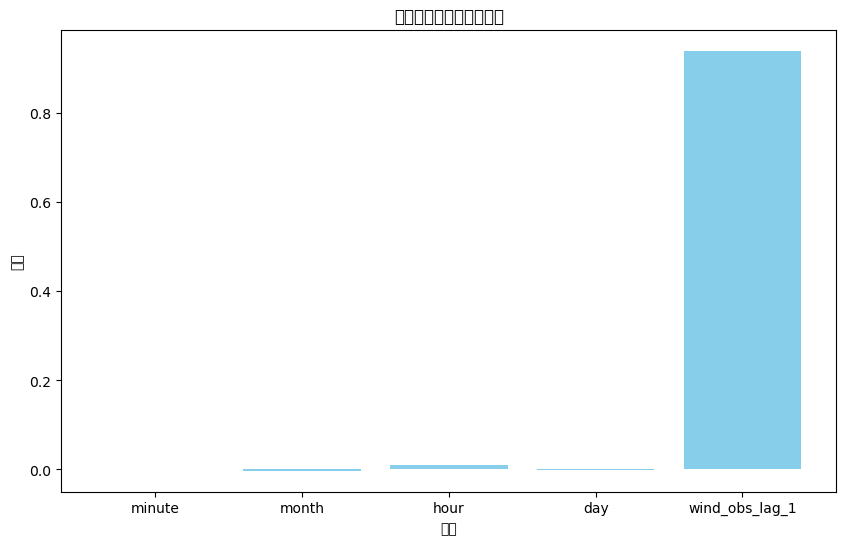

In [56]:
# 初始化线性回归模型
model = LinearRegression()

# 训练模型
model.fit(X_train, y_train)

# 输出模型系数
print("\n模型系数：")
print(f"截距项 (Intercept): {model.intercept_}")
print(f"特征系数 (Coefficients): {model.coef_}")
print(f"特征名称: {features}")
print(f"对应系数: {model.coef_}")

# 可选：绘制特征系数的柱状图
plt.figure(figsize=(10, 6))
plt.bar(features, model.coef_, color='skyblue')
plt.xlabel('特征')
plt.ylabel('系数')
plt.title('线性回归模型的特征系数')
plt.show()


替换后的异常点数据：
               date_time  wind_obs  power_real  is_anomaly  minute  hour  day  \
6367 2023-06-06 07:45:00  5.790340         0.0        True      45     7    6   
6368 2023-06-06 08:00:00  4.813231         0.2        True       0     8    6   
6369 2023-06-06 08:15:00  4.080642         0.0        True      15     8    6   
6370 2023-06-06 08:30:00  3.920216         0.0        True      30     8    6   
6371 2023-06-06 08:45:00  3.762329         0.0        True      45     8    6   
6372 2023-06-06 09:00:00  3.724190         0.0        True       0     9    6   
6373 2023-06-06 09:15:00  3.724082         0.0        True      15     9    6   
6374 2023-06-06 09:30:00  3.723975         0.0        True      30     9    6   
6375 2023-06-06 09:45:00  3.723868         0.0        True      45     9    6   
6376 2023-06-06 10:00:00  3.734906         0.0        True       0    10    6   

      month  wind_obs_lag_1  
6367      6          5.8646  
6368      6          4.8137  
6369  

               date_time  wind_obs  power_real  is_anomaly  minute  hour  day  \
6395 2023-06-06 14:45:00  3.777449         0.0        True      45    14    6   
6396 2023-06-06 15:00:00  3.788486         0.0        True       0    15    6   
6397 2023-06-06 15:15:00  3.788379         0.0        True      15    15    6   
6398 2023-06-06 15:30:00  3.788272         0.0        True      30    15    6   
6399 2023-06-06 15:45:00  3.788165         0.0        True      45    15    6   
6400 2023-06-06 16:00:00  3.799202         0.0        True       0    16    6   
6401 2023-06-06 16:15:00  3.799095         0.0        True      15    16    6   
6402 2023-06-06 16:30:00  3.798988         0.0        True      30    16    6   
6403 2023-06-06 16:45:00  3.798881         0.0        True      45    16    6   
6404 2023-06-06 17:00:00  3.809919         0.0        True       0    17    6   
6405 2023-06-06 17:15:00  3.809811         0.0        True      15    17    6   

      month  wind_obs_lag_1

               date_time  wind_obs  power_real  is_anomaly  minute  hour  day  \
6433 2023-06-07 00:15:00  3.626814         0.1        True      15     0    7   
6434 2023-06-07 00:30:00  3.626707         0.1        True      30     0    7   
6435 2023-06-07 00:45:00  3.626600         0.1        True      45     0    7   
6436 2023-06-07 01:00:00  3.637638         0.1        True       0     1    7   
6437 2023-06-07 01:15:00  3.637530         0.1        True      15     1    7   
6438 2023-06-07 01:30:00  3.637423         0.1        True      30     1    7   
6439 2023-06-07 01:45:00  3.637316         0.1        True      45     1    7   
6440 2023-06-07 02:00:00  3.648354         0.1        True       0     2    7   
6441 2023-06-07 02:15:00  3.648246         0.1        True      15     2    7   
6442 2023-06-07 02:30:00  3.648139         0.1        True      30     2    7   
6443 2023-06-07 02:45:00  3.648032         0.1        True      45     2    7   

      month  wind_obs_lag_1

               date_time  wind_obs  power_real  is_anomaly  minute  hour  day  \
6468 2023-06-07 09:00:00  3.723367         0.1        True       0     9    7   
6469 2023-06-07 09:15:00  3.723259         0.1        True      15     9    7   
6470 2023-06-07 09:30:00  3.723152         0.1        True      30     9    7   
6471 2023-06-07 09:45:00  3.723045         0.1        True      45     9    7   
6472 2023-06-07 10:00:00  3.734083         0.1        True       0    10    7   
6473 2023-06-07 10:15:00  3.733976         0.1        True      15    10    7   
6474 2023-06-07 10:30:00  3.733868         0.1        True      30    10    7   
6475 2023-06-07 10:45:00  3.733761         0.1        True      45    10    7   
6476 2023-06-07 11:00:00  3.744799         0.1        True       0    11    7   
6477 2023-06-07 11:15:00  3.744692         0.1        True      15    11    7   
6478 2023-06-07 11:30:00  3.744585         0.1        True      30    11    7   

      month  wind_obs_lag_1

               date_time  wind_obs  power_real  is_anomaly  minute  hour  day  \
6499 2023-06-07 16:45:00  3.798058         0.1        True      45    16    7   
6500 2023-06-07 17:00:00  3.809096         0.1        True       0    17    7   
6501 2023-06-07 17:15:00  3.808989         0.1        True      15    17    7   
6502 2023-06-07 17:30:00  3.808881         0.1        True      30    17    7   
6503 2023-06-07 17:45:00  3.808774         0.1        True      45    17    7   
6504 2023-06-07 18:00:00  3.819812         0.1        True       0    18    7   
6505 2023-06-07 18:15:00  3.819705         0.1        True      15    18    7   
6506 2023-06-07 18:30:00  3.819598         0.1        True      30    18    7   
6507 2023-06-07 18:45:00  3.819490         0.1        True      45    18    7   
6508 2023-06-07 19:00:00  3.830528         0.1        True       0    19    7   
6509 2023-06-07 19:15:00  3.830421         0.1        True      15    19    7   

      month  wind_obs_lag_1

               date_time  wind_obs  power_real  is_anomaly  minute  hour  day  \
6535 2023-06-08 01:45:00  3.636493         0.1        True      45     1    8   
6536 2023-06-08 02:00:00  3.647531         0.1        True       0     2    8   
6537 2023-06-08 02:15:00  3.647424         0.1        True      15     2    8   
6538 2023-06-08 02:30:00  3.647316         0.1        True      30     2    8   
6539 2023-06-08 02:45:00  3.647209         0.1        True      45     2    8   
6540 2023-06-08 03:00:00  3.658247         0.1        True       0     3    8   
6541 2023-06-08 03:15:00  3.658140         0.1        True      15     3    8   
6542 2023-06-08 03:30:00  3.658033         0.1        True      30     3    8   
6543 2023-06-08 03:45:00  3.657925         0.1        True      45     3    8   
6544 2023-06-08 04:00:00  3.668963         0.1        True       0     4    8   
6545 2023-06-08 04:15:00  3.668856         0.1        True      15     4    8   

      month  wind_obs_lag_1

               date_time  wind_obs  power_real  is_anomaly  minute  hour  day  \
6602 2023-06-08 18:30:00  3.818775         0.1        True      30    18    8   
6603 2023-06-08 18:45:00  3.818668         0.1        True      45    18    8   
6604 2023-06-08 19:00:00  3.829705         0.1        True       0    19    8   
6605 2023-06-08 19:15:00  3.829598         0.1        True      15    19    8   
6606 2023-06-08 19:30:00  3.829491         0.1        True      30    19    8   
6607 2023-06-08 19:45:00  3.829384         0.1        True      45    19    8   
6608 2023-06-08 20:00:00  3.840421         0.1        True       0    20    8   
6609 2023-06-08 20:15:00  3.840314         0.1        True      15    20    8   
6610 2023-06-08 20:30:00  3.840207         0.1        True      30    20    8   
6611 2023-06-08 20:45:00  3.840100         0.1        True      45    20    8   
6612 2023-06-08 21:00:00  3.851137         0.1        True       0    21    8   

      month  wind_obs_lag_1

               date_time  wind_obs  power_real  is_anomaly  minute  hour  day  \
6710 2023-06-09 21:30:00  3.850100         0.0        True      30    21    9   
6711 2023-06-09 21:45:00  3.849993         0.0        True      45    21    9   
6712 2023-06-09 22:00:00  3.861031         0.0        True       0    22    9   
6713 2023-06-09 22:15:00  3.860924         0.0        True      15    22    9   
6714 2023-06-09 22:30:00  3.924098      1444.4        True      30    22    9   
6715 2023-06-09 22:45:00  6.857399     21115.8        True      45    22    9   
6716 2023-06-09 23:00:00  9.800900     45725.5       False       0    23    9   
6717 2023-06-09 23:15:00  9.702800     53503.1       False      15    23    9   
6718 2023-06-09 23:30:00  9.638700     52448.1       False      30    23    9   
6719 2023-06-09 23:45:00  9.104700     43530.0       False      45    23    9   
6720 2023-06-10 00:00:00  7.577200     29153.3       False       0     0   10   

      month  wind_obs_lag_1

C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from curren

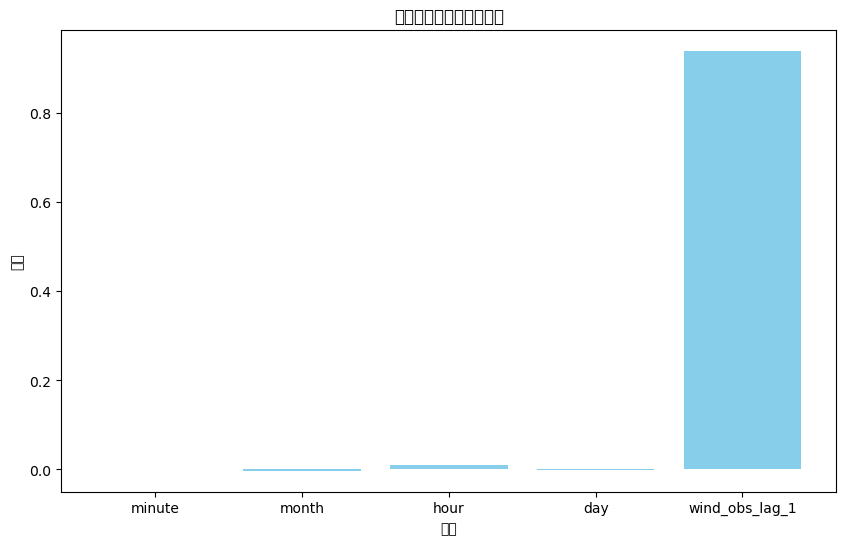

In [57]:
# 预测异常点的值
y_anomaly_pred = model.predict(X_anomaly)

# 将预测值替换到原始数据中
filtered_data.loc[filtered_data['is_anomaly'], target] = y_anomaly_pred

# 检查替换后的数据
print("\n替换后的异常点数据：")
print(filtered_data[filtered_data['is_anomaly']].head(10))

# 查看包含异常点的区域
print("\n查看包含异常点的区域（前后各5行）：")
anomaly_indices = filtered_data[filtered_data['is_anomaly']].index
for idx in anomaly_indices:
    print(filtered_data.loc[idx-5:idx+5])

# 可选：绘制特征系数的柱状图
plt.figure(figsize=(10, 6))
plt.bar(features, model.coef_, color='skyblue')
plt.xlabel('特征')
plt.ylabel('系数')
plt.title('线性回归模型的特征系数')
plt.show()

In [58]:
# 导出处理后的数据到CSV文件
output_columns = ['date_time', 'wind_obs', 'power_real']  # 需要导出的列
output_file = r'C:\Users\11712\notebook所有\Untitled Folder\train_ID01-1.csv'
filtered_data[output_columns].to_csv(output_file, index=False)

print(f"\n处理后的数据已导出到文件：{output_file}")


处理后的数据已导出到文件：C:\Users\11712\notebook所有\Untitled Folder\train_ID01-1.csv


# 使用线性插值替换连续相同值异常点

In [64]:
import pandas as pd

# 读取CSV文件
file_path = r'C:\Users\11712\notebook所有\Untitled Folder\train\train_ID01.csv'  # CSV文件路径
df = pd.read_csv(file_path)

# 将时间列 'date_time' 转换为 datetime 类型
df['date_time'] = pd.to_datetime(df['date_time'])

# 筛选出指定时间范围内的数据
start_date = '2023-06-01 00:00:00'
end_date = '2024-05-31 23:45:00'
filtered_df = df[(df['date_time'] >= start_date) & (df['date_time'] <= end_date)].copy()

# 找出连续相同值的区间
filtered_df['change'] = filtered_df['wind_obs'] != filtered_df['wind_obs'].shift(1)  # 标记值变化的位置
filtered_df['group'] = filtered_df['change'].cumsum()  # 为连续相同的值分组
grouped = filtered_df.groupby('group')

# 筛选出连续长度大于某个阈值（如3）的区间
threshold = 3
outliers = grouped.filter(lambda x: len(x) > threshold)

# 输出连续相同异常点
print("连续相同异常点：\n", outliers)

# 线性插值替换连续相同值异常点
for group, group_data in grouped:
    if len(group_data) > threshold:
        start_idx = group_data.index[0]
        end_idx = group_data.index[-1]
        
        # 线性插值替换异常区间
        # 找到异常区间的前后非异常值
        prev_value = filtered_df.loc[start_idx - 1, 'wind_obs'] if start_idx > 0 else None
        next_value = filtered_df.loc[end_idx + 1, 'wind_obs'] if end_idx < len(filtered_df) - 1 else None
        
        # 如果前后都有值，则进行线性插值
        if prev_value is not None and next_value is not None:
            filtered_df.loc[start_idx:end_idx, 'wind_obs'] = filtered_df.loc[start_idx:end_idx, 'wind_obs'].interpolate(
                method='linear', limit_direction='both', limit_area='inside')
        # 如果只有前值或后值，则用前值或后值填充
        elif prev_value is not None:
            filtered_df.loc[start_idx:end_idx, 'wind_obs'] = prev_value
        elif next_value is not None:
            filtered_df.loc[start_idx:end_idx, 'wind_obs'] = next_value

# 检查替换后的数据
print("\n替换后的数据：")
print(filtered_df.head(10))

# 导出处理后的数据到CSV文件
output_columns = ['date_time', 'wind_obs', 'power_real']  # 需要导出的列
output_file = r'C:\Users\11712\notebook所有\Untitled Folder\processed_data.csv'
filtered_df[output_columns].to_csv(output_file, index=False)

print(f"\n处理后的数据已导出到文件：{output_file}")

连续相同异常点：
                 date_time  wind_obs  power_real  change  group
6368  2023-06-06 08:00:00    3.6441         0.2    True    513
6369  2023-06-06 08:15:00    3.6441         0.0   False    513
6370  2023-06-06 08:30:00    3.6441         0.0   False    513
6371  2023-06-06 08:45:00    3.6441         0.0   False    513
6372  2023-06-06 09:00:00    3.6441         0.0   False    513
...                   ...       ...         ...     ...    ...
40987 2024-05-31 22:45:00    3.6059         0.0   False  34691
40988 2024-05-31 23:00:00    3.6059         0.0   False  34691
40989 2024-05-31 23:15:00    3.6059         0.0   False  34691
40990 2024-05-31 23:30:00    3.6059         0.0   False  34691
40991 2024-05-31 23:45:00    3.6059         0.0   False  34691

[441 rows x 5 columns]

替换后的数据：
               date_time  wind_obs  power_real  change  group
5856 2023-06-01 00:00:00    5.1346     33742.5    True      1
5857 2023-06-01 00:15:00    5.6346     44614.8    True      2
5858 2023-06-01

In [63]:
group_data

,date_time,wind_obs,power_real,change,group
40986,2024-05-31 22:30:00,3.6059,0.0,True,34691
40987,2024-05-31 22:45:00,3.6059,0.0,False,34691
40988,2024-05-31 23:00:00,3.6059,0.0,False,34691
40989,2024-05-31 23:15:00,3.6059,0.0,False,34691
40990,2024-05-31 23:30:00,3.6059,0.0,False,34691
40991,2024-05-31 23:45:00,3.6059,0.0,False,34691
